In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!pip install annoy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pymorphy2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install stop_words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from multiprocessing import Pool
from tqdm import tqdm_notebook as tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/not_toxic_answers.csv") 

In [ ]:
df.drop(columns=['answers'], inplace=True)

In [ ]:
df.head()

,qwest,not_toxic_answers
0,! марта -день кошек. Как отмечать будем? .,"['всем валерьянки и вискаса.', 'Начинаем метит..."
1,!!! Зачем умному мужчина красота? .,"['Чтобы его ум не замечали иногда..', 'так вы ..."
2,!!!!!!!!!!!!!!!Где можно продать почтовые марк...,['Можно продать на Таганке примерно за 300-400...
3,"!!!!!СОС!!!!!!!!есть число бесконечности, если...",['<p> \xa0А бесконечность вовсе не число. Это ...
4,!!!!Конкурс!!!!Самая красивая игрушка на свете...,['у меня 2 на твоё усмотрение<br><br>.']


In [ ]:
df.shape

(280730, 2)

In [ ]:
import string
import nltk
nltk.download('stopwords')
import annoy
import numpy as np
import tensorflow as tf
from pymorphy2 import MorphAnalyzer
from stop_words import get_stop_words
from tqdm import tqdm_notebook
from transformers import TFAutoModel, AutoTokenizer
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
morpher = MorphAnalyzer()
sw = set(get_stop_words("ru") + nltk.corpus.stopwords.words('russian'))
exclude = set(string.punctuation)

In [ ]:
def preprocess_txt(line):
    line=re.sub(re.compile(r'[^\w\s]'), " ", line)
    line=re.sub(re.compile(r'[^a-zA-Zа-яА-Я0-9]'), " ", line)
    spls = "".join(i for i in line.strip() if i not in exclude).split()
    spls = [morpher.parse(i.lower())[0].normal_form for i in spls]
    spls = [i for i in spls if i not in sw and i != ""]
    #spls = [i for i in spls if i != ""]
    return ' '.join(spls)

In [ ]:
%%time

with Pool(3) as p:
    qwest = list(tqdm(p.imap(preprocess_txt, df['qwest'])))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


0it [00:00, ?it/s]

CPU times: user 30.7 s, sys: 4.78 s, total: 35.4 s
Wall time: 8min 26s


In [ ]:
df['clear_qwest'] = qwest

In [ ]:
df.drop(columns=['qwest'], inplace=True)

In [ ]:
df.shape

(280730, 2)

In [ ]:
question = []
answer = []
errors = []
with open("/content/drive/MyDrive/Colab Notebooks/planeta_qwestions.txt", "r") as f:
    for line in tqdm_notebook(f):
        spls = line.split("\t")
        if len(spls)==1:
            errors.append(spls)
            continue
        question.append(spls[0].strip())
        answer.append(spls[1].strip())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


0it [00:00, ?it/s]

In [ ]:
errors

[['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 ['\n'],
 

In [ ]:
planeta_qwestions = pd.DataFrame({'qwest': question, 'ans': answer})

In [ ]:
planeta_qwestions

,qwest,ans
0,Вы продаете дачу?,"да, продаю."
1,Вы продаете участок?,"да, продаю."
2,Вы продаете коттедж?,"да, продаю."
3,Сколько стоит?,1 тугрик.
4,Какая стоимость?,1 тугрик.
...,...,...
357,Председатель правления,Рoмaнoв Рoмaн Алeкcaндрoвич.
358,Члены правления,Виниченко Иван Михайлович; Маркелов Андрей Вла...
359,Режим работы правления,Правление собирается каждую субботу с 10 до 14...
360,Расписание работы правления,Правление собирается каждую субботу с 10 до 14...


In [ ]:
%%time

with Pool(3) as p:
    qwest = list(tqdm(p.imap(preprocess_txt, planeta_qwestions['qwest'])))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


0it [00:00, ?it/s]

CPU times: user 108 ms, sys: 72.4 ms, total: 180 ms
Wall time: 527 ms


In [ ]:
planeta_qwestions['morpher_qwest'] = qwest

In [ ]:
planeta_qwestions.head()

,qwest,ans,morpher_qwest
0,Вы продаете дачу?,"да, продаю.",продавать дача
1,Вы продаете участок?,"да, продаю.",продавать участок
2,Вы продаете коттедж?,"да, продаю.",продавать коттедж
3,Сколько стоит?,1 тугрик.,стоить
4,Какая стоимость?,1 тугрик.,стоимость


In [ ]:
morpher_qwest_tokens = []
for i in planeta_qwestions.morpher_qwest:
    tokens = i.split()
    if len(tokens) < 2:
        continue
    morpher_qwest_tokens.extend(tokens)

In [ ]:
morpher_qwest_tokens = set(morpher_qwest_tokens)

In [ ]:
morpher_qwest_tokens = list(morpher_qwest_tokens)

In [ ]:
len(morpher_qwest_tokens)

139

In [ ]:
associates = []
with open("/content/drive/MyDrive/Colab Notebooks/semantic_associates.txt", "r") as f:
    for line in tqdm_notebook(f):
        spls = preprocess_txt(line)
        if len(spls)==1 or len(spls)==0:
            errors.append(spls)
            continue
        associates.append(spls)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


0it [00:00, ?it/s]

In [ ]:
#errors

In [ ]:
len(associates)

687

In [ ]:
morpher_qwest_tokens.extend(associates)

In [ ]:
len(morpher_qwest_tokens)

826

In [ ]:
morpher_qwest_tokens = set(morpher_qwest_tokens)

In [ ]:
morpher_qwest_tokens = list(morpher_qwest_tokens)

In [ ]:
len(morpher_qwest_tokens)

603

In [ ]:
df.clear_qwest[1]

'умный мужчина красота'

In [ ]:
def is_willa(text):
    cnt=0
    for i in text.split():
        if i in morpher_qwest_tokens:
            cnt+=1
    return cnt

In [ ]:
%%time

with Pool(3) as p:
    cnt = list(tqdm(p.imap(is_willa, df['clear_qwest'])))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


0it [00:00, ?it/s]

CPU times: user 15.3 s, sys: 3.04 s, total: 18.4 s
Wall time: 36 s


In [ ]:
df['willa'] = cnt

In [ ]:
df_willa=df.loc[df['willa']==0]

In [ ]:
def len_qwest(text):
    return len(text.split())

In [ ]:
%%time

with Pool(3) as p:
    cnt = list(tqdm(p.imap(len_qwest, df_willa['clear_qwest'])))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


0it [00:00, ?it/s]

CPU times: user 13.1 s, sys: 4.01 s, total: 17.1 s
Wall time: 18.8 s


In [ ]:
df_willa['len_qwest'] = cnt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


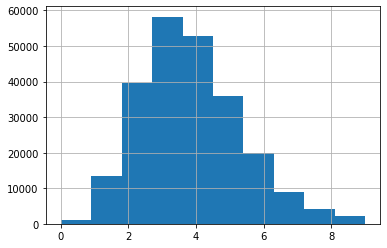

In [ ]:
df_willa['len_qwest'].loc[df_willa['len_qwest']<10].hist()

In [ ]:
len(df_willa.loc[(df_willa['len_qwest']<7) & (df_willa['len_qwest']>2)])

166948

In [ ]:
# Потом обработаю весь  df
df_willa = df_willa.loc[(df_willa['len_qwest']<7) & (df_willa['len_qwest']>2)]

In [ ]:
df_willa.columns

Index(['not_toxic_answers', 'clear_qwest', 'willa', 'len_qwest'], dtype='object')

In [ ]:
df_willa.drop(columns=['willa', 'len_qwest'], inplace=True)

In [ ]:
df_willa_short=df_willa.head(50000)

In [ ]:
df_willa.to_csv("df_willa_boltalca.csv", index=False)

In [ ]:
df_willa_short.to_csv("df_willa_boltalca_short.csv", index=False)

## Запустил обучение на укороченном до 50000 датасете

In [ ]:
df_willa=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/df_willa_boltalca.csv")

In [ ]:
df_willa.shape

(166948, 2)

In [ ]:
test = df_willa.head(100)

In [ ]:
bert = TFAutoModel.from_pretrained("setu4993/LaBSE")
tokenizer = AutoTokenizer.from_pretrained("setu4993/LaBSE")

All model checkpoint layers were used when initializing TFBertModel.

All the layers of TFBertModel were initialized from the model checkpoint at setu4993/LaBSE.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
%%time

bert_index = annoy.AnnoyIndex(768 , 'angular')

index_map = {}
counter = 0
for i in range(len(df_willa)):
    index_map[counter] = df_willa.loc[i]['not_toxic_answers']
    question = df_willa.loc[i]['clear_qwest']
        
    tok = tokenizer(question, return_token_type_ids=False, return_tensors='tf')
    out_state = bert(**tok)[1].numpy()[0]
    bert_index.add_item(counter, out_state)
    counter += 1
        

bert_index.build(10)

In [ ]:
bert_index.save('bert_index_boltalka_long')

In [ ]:
bert_index = annoy.AnnoyIndex(768, 'angular')
bert_index.load('bert_index_boltalka_long') 

In [ ]:
def get_response(question, index, index_map):
    question = preprocess_txt(question)
    tok = tokenizer(question, return_token_type_ids=False, return_tensors='tf')
    vector = bert(**tok)[1].numpy()[0]
    answers = index.get_nns_by_vector(vector, 1, )
    return [index_map[i] for i in answers]

In [ ]:
get_response("какой навигатор выбрать?", bert_index, index_map)

In [ ]:
get_response("какие новые фильмы есть?", bert_index, index_map)

In [ ]:
get_response("куда можно сходить?", bert_index, index_map)

In [ ]:
index_map

In [ ]:
try:
    import cPickle as pickle
except ImportError:  # Python 3.x
    import pickle

with open('index_map_boltalka_long.p', 'wb') as fp:
    pickle.dump(index_map, fp, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('index_map_boltalka_long.p', 'rb') as fp:
    data = pickle.load(fp)